## Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

In this situation, the best regression metric to employ would be Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).) These metrics are commonly used in regression problems to measure the difference between the predicted and actual values.

MSE calculates the average of the squared differences between the predictions and the actual values, while RMSE is the square root of the MSE. The advantage of using RMSE is that it is in the same unit as the target variable (house price in this case), which makes it easier to interpret.

However, it's important to note that the choice of the metric may also depend on the specific requirements of the problem or the business use case. For instance, if the penalty for under-predicting is more than over-predicting, then a metric like Mean Absolute Percentage Error (MAPE) could be considered.

## You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

If your goal is to predict the actual price of a house as accurately as possible, Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) would be more appropriate metrics to evaluate your SVM regression model than R-squared.

MSE and RMSE measure the average magnitude of the error between the predicted and actual values, which directly reflects the accuracy of the predictions. Lower values of MSE or RMSE indicate better performance of the model.

On the other hand, R-squared measures the proportion of variance in the target variable that is explained by the independent variables in the model. While it can provide insight into the goodness of fit of the model, it does not directly reflect the accuracy of the predictions. Moreover, R-squared has some limitations, such as its sensitivity to the scale of the variables and its tendency to increase with the addition of more independent variables, even if they do not improve the model's predictive power.

Therefore, if your primary goal is to predict the actual price of a house as accurately as possible, it is recommended to use MSE or RMSE as the evaluation metric for your SVM regression model.

## Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

If your dataset contains a significant number of outliers, Mean Absolute Error (MAE) or Huber Loss could be more appropriate regression metrics to use with your SVM model than Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

MSE and RMSE are sensitive to outliers because they square the errors, which can result in large values that disproportionately affect the overall metric. In contrast, MAE calculates the absolute difference between the predicted and actual values, which is less sensitive to outliers.

Huber Loss is another metric that is less sensitive to outliers than MSE or RMSE. It is a combination of MSE and MAE that uses MSE for small errors and MAE for large errors. The transition between MSE and MAE is controlled by a parameter called delta, which can be tuned based on the level of outliers in the dataset.

Therefore, if your dataset contains a significant number of outliers, it is recommended to use MAE or Huber Loss as the regression metric for your SVM model to reduce the impact of outliers on the evaluation of the model's performance.

## Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10957,Super built-up Area,Ready To Move,Padmanabhanagar,2 BHK,NaN,1100,2.0,1.0,60.0
7264,Super built-up Area,Ready To Move,Nagadevanahalli,3 BHK,Gaenty,1240,2.0,2.0,65.0
12843,Super built-up Area,22-May,Jakkur,3 BHK,SoineC,1932.47,3.0,2.0,183.0
10013,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,Klark L,1787,3.0,2.0,116.0
5964,Super built-up Area,Ready To Move,Thanisandra,2 BHK,Bhmesy,1276,2.0,2.0,75.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df['location'].isnull().sum()

1

In [14]:
df.shape[0]

13320

In [17]:
df.duplicated().sum()

529

In [18]:
df.drop_duplicates(inplace=True)

In [26]:
for col in df.columns:
    if df[col].isnull().any():
        count=df[col].isnull().sum()
        percentage=df[col].isnull().sum()/df.shape[0]
        print(f'column {col} has {count} null values and with percentage {percentage*100}')

column location has 1 null values and with percentage 0.007817997029161129
column size has 16 null values and with percentage 0.12508795246657806
column bath has 73 null values and with percentage 0.5707137831287624
column balcony has 605 null values and with percentage 4.729888202642483


In [20]:
df.drop(columns=['society'],inplace=True)

In [27]:
df['location'].value_counts()

Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [28]:
df['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [6]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [7]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [29]:
df['balcony'].value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262,2.0,2.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [39]:
def is_float_or_integer(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
df[~df['total_sqft'].apply(is_float_or_integer)].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800


In [41]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [42]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [46]:
df[df['bath']==40]

,area_type,availability,location,size,total_sqft,bath,balcony,price
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0


In [50]:
df.drop(columns=['availability'],inplace=True)

In [52]:
df.sample(3)

,area_type,location,size,total_sqft,bath,balcony,price
8716,Super built-up Area,Raghavendra Layout,3 BHK,1499.0,3.0,2.0,89.0
13006,Carpet Area,Kereguddadahalli,3 BHK,1280.0,3.0,1.0,42.0
620,Super built-up Area,Hebbal,3 BHK,1920.0,3.0,2.0,134.0


In [53]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [65]:
df['area_type'].value_counts()

Super built-up  Area    8012
Built-up  Area          2290
Plot  Area              1801
Carpet  Area              82
Name: area_type, dtype: int64

In [64]:
df.groupby('area_type')['price'].mean()

area_type
Built-up  Area          100.142031
Carpet  Area             81.764695
Plot  Area              198.558362
Super built-up  Area     89.597328
Name: price, dtype: float64

In [66]:
df.groupby('area_type')['price'].max()

area_type
Built-up  Area          1100.0
Carpet  Area             240.0
Plot  Area              2800.0
Super built-up  Area    2912.0
Name: price, dtype: float64

In [68]:
df[df['price']==2800]

,area_type,location,size,total_sqft,bath,balcony,price
13200,Plot Area,Defence Colony,6 Bedroom,8000.0,6.0,3.0,2800.0


In [69]:
df['total_sqft'].max()

52272.0

In [70]:
df[df['total_sqft']==52272]

,area_type,location,size,total_sqft,bath,balcony,price
1894,Plot Area,Nelamangala,3 Bedroom,52272.0,2.0,1.0,140.0


In [71]:
df.drop(columns=['area_type'],inplace=True)

In [73]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13312,Bellandur,2 BHK,1262.0,2.0,2.0,47.00
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


In [74]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [75]:
df['location'].value_counts()

Whitefield            497
Sarjapur  Road        352
Electronic City       285
Kanakpura Road        238
Thanisandra           226
                     ... 
Milk Colony             1
Jaladarsini Layout      1
Sundara Nagar           1
Madanayakahalli         1
Abshot Layout           1
Name: location, Length: 1265, dtype: int64

In [80]:
location_stats = df.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield              497
Sarjapur  Road          352
Electronic City         285
Kanakpura Road          238
Thanisandra             226
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1265, dtype: int64

In [81]:
location_stats[location_stats<=10].count()

1038

In [82]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Doddakallasandra        10
Kodigehalli             10
Gunjur Palya            10
HAL 2nd Stage           10
ISRO Layout             10
                        ..
Kalhalli                 1
Kalkere Channasandra     1
 Banaswadi               1
Kamdhenu Nagar           1
whitefiled               1
Name: location, Length: 1038, dtype: int64

In [83]:
df.location = df.location.apply(lambda loc: 'other' if loc in location_stats_less_than_10.index else loc)
len(df.location.unique())

228

In [85]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,2


In [86]:
df = df[~(df.total_sqft/df.bhk<300)]
df

,location,size,total_sqft,bath,balcony,price,price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,2
...,...,...,...,...,...,...,...,...
13312,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,3724.247227,2
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,6530.612245,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,6689.834926,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,5258.545136,2


In [87]:
df['price_per_sqft'].describe()

count     11498.000000
mean       6263.708278
std        4048.606167
min         267.829813
25%        4226.921275
50%        5290.820191
75%        6875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [88]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df)
df7.shape

(9425, 8)

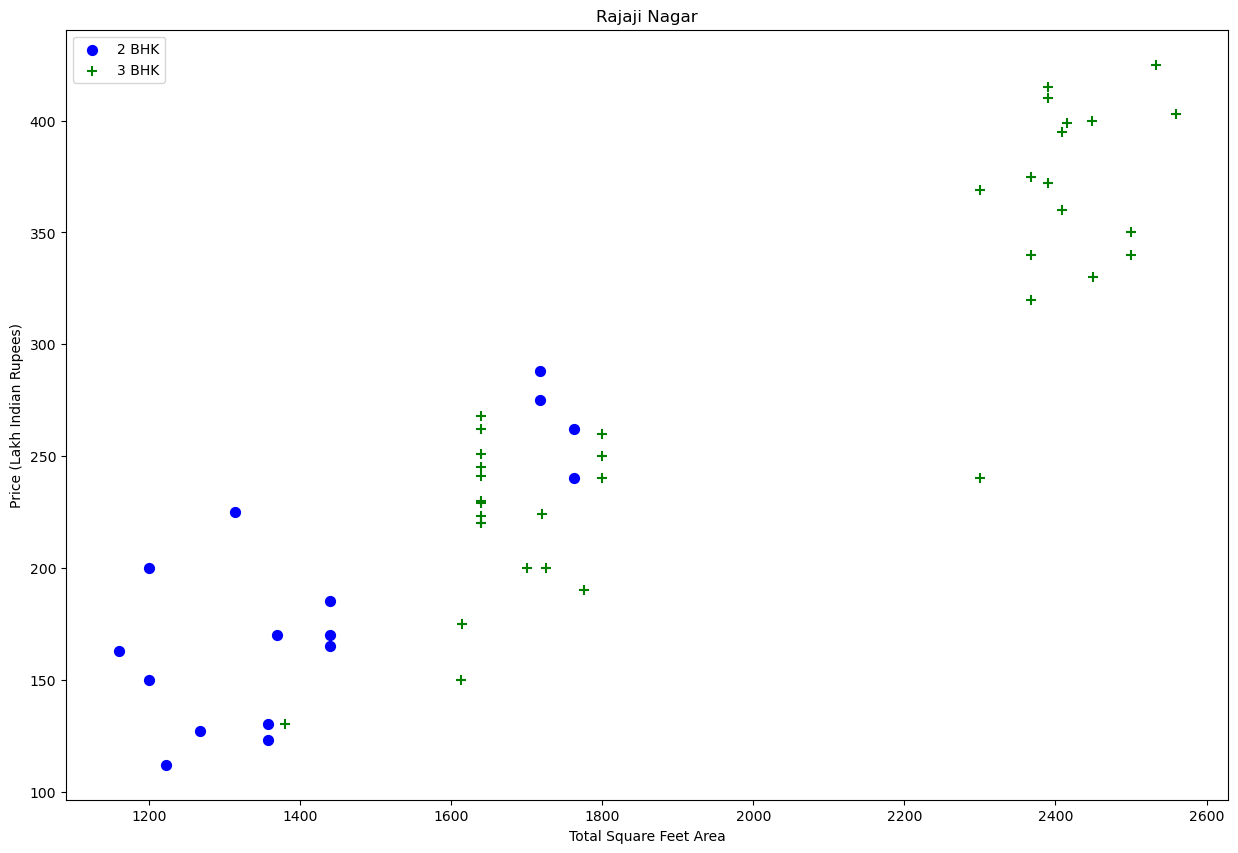

In [91]:
import matplotlib.pyplot as plt
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [92]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(6693, 8)

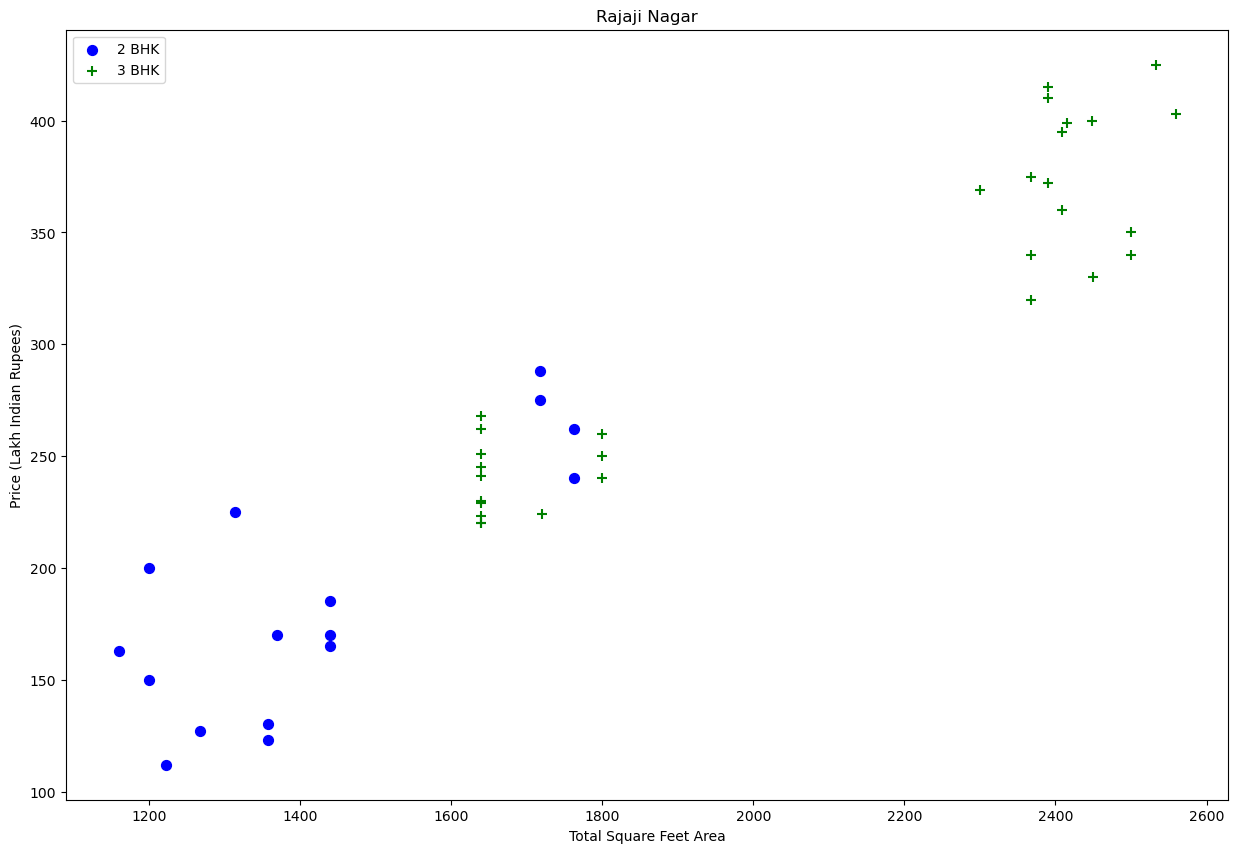

In [93]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [98]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
...,...,...,...,...,...,...
9412,other,1650.0,1.0,1.0,130.0,2
9416,other,1155.0,2.0,1.0,64.0,2
9418,other,1200.0,2.0,3.0,70.0,2
9419,other,1800.0,1.0,1.0,200.0,1


In [96]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6625, 8)

In [97]:
df9

,location,size,total_sqft,bath,balcony,price,price_per_sqft,bhk
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,3200.000000,2
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,6916.666667,2
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,3418.803419,2
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,4561.403509,3
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,4540.654699,2
...,...,...,...,...,...,...,...,...
9412,other,2 BHK,1650.0,1.0,1.0,130.0,7878.787879,2
9416,other,2 BHK,1155.0,2.0,1.0,64.0,5541.125541,2
9418,other,2 BHK,1200.0,2.0,3.0,70.0,5833.333333,2
9419,other,1 BHK,1800.0,1.0,1.0,200.0,11111.111111,1


In [99]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6625 entries, 1 to 9422
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6625 non-null   object 
 1   total_sqft  6625 non-null   float64
 2   bath        6625 non-null   float64
 3   balcony     6625 non-null   float64
 4   price       6625 non-null   float64
 5   bhk         6625 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 362.3+ KB


In [100]:
dummies = pd.get_dummies(df10.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412,other,1650.0,1.0,1.0,130.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9416,other,1155.0,2.0,1.0,64.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9418,other,1200.0,2.0,3.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,other,1800.0,1.0,1.0,200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df12 = df11.drop('location',axis='columns')
df12

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412,1650.0,1.0,1.0,130.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9416,1155.0,2.0,1.0,64.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9418,1200.0,2.0,3.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,1800.0,1.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y = df12.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [106]:
X.shape

(6625, 231)

In [107]:
y.shape

(6625,)

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [109]:
from sklearn.svm import LinearSVR,SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
svr=SVR(kernel='poly')

In [110]:
svr.fit(x_train,y_train)

SVR(kernel='poly')

In [111]:
y_pred=svr.predict(x_test)
print('r2 score is',r2_score(y_test,y_pred))

r2 score is 0.23114033158094882


In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8470606497614888

In [120]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae,mse

(30.44983320658728, 3600.0866801784014)

In [ ]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print('r2 score is',r2_score(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae,mse